# **Reporte de Datos**
---

In [17]:
# Librerias
import os
import pandas as pd
import requests
import logging
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Funcion para crear el objeto de creación de logs
def create_logger():
  logging.basicConfig(level = logging.INFO, format = '%(asctime)s - %(levenname)s - %(message)s')
  logger = logging.getLogger('Logger')
  logger.info('Logger creado')
  return logger

In [3]:
# Función de consumo a la base de datos de Firebase para cargar el DataSet
def download_firebase(url, logger):
  logger.info("Extrayendo el archivo desde Firebase")
  df = None
  try:
    df = pd.read_csv(url)
    logger.info("Archivo cargado")
  except requests.exceptions.RequestException as e:
    logger.info(f"Error al descargar el archivo CSV: {e}")
  except pd.errors.EmptyDataError:
    logger.info("El archivo CSV está vacío.")
  except Exception as e:
    logger.info(f"Ocurrió un error inesperado: {e}")
  return df

In [4]:
# Cargar DataSet
url = 'https://firebasestorage.googleapis.com/v0/b/personalwp-8822c.appspot.com/o/diabetes_prediction_dataset.csv?alt=media&token=4d70d154-c3d0-4fa0-a3aa-9b9972dd3b95'
logger = create_logger()
df = download_firebase(url, logger)

In [5]:
# Eliminación de valores atípicos y duplicados
seventy_fifth = df['bmi'].quantile(0.75)
twenty_fifth = df['bmi'].quantile(0.25)
iqr = seventy_fifth - twenty_fifth
upper = seventy_fifth + (10 * iqr)
outliers_bmi_upper = df[(df['bmi'] > upper)]
df = pd.merge(df, outliers_bmi_upper, indicator = True, how = 'outer').query('_merge == "left_only"').drop('_merge', axis = 1)
df = df.drop_duplicates(keep = "first")

## **Relación entre Variables Explicativas y Variable Objetivo**

In [7]:
# Variables del DataSet
variables = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']]

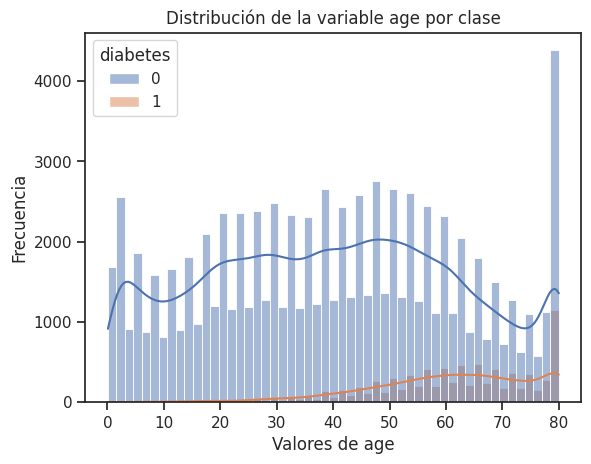

In [11]:
# Distribución de la variable 'age'
plt.title('Distribución de la variable age por clase')
plt.xlabel('Valores de age')
plt.ylabel('Frecuencia')
sns.histplot(data = variables, x = 'age', hue = 'diabetes', kde = True)
plt.show()

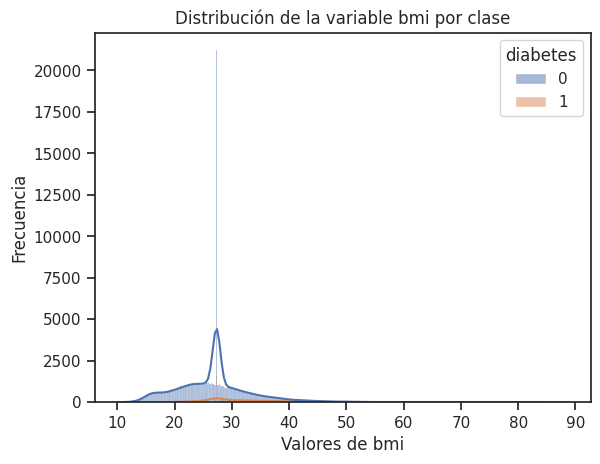

In [12]:
# Distribución de la variable 'bmi'
plt.title('Distribución de la variable bmi por clase')
plt.xlabel('Valores de bmi')
plt.ylabel('Frecuencia')
sns.histplot(data = variables, x = 'bmi', hue = 'diabetes', kde = True)
plt.show()

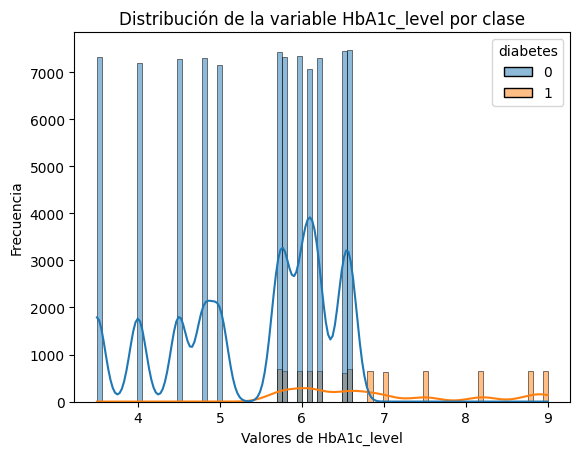

In [8]:
# Distribución de la variable 'HbA1c_level'
plt.title('Distribución de la variable HbA1c_level por clase')
plt.xlabel('Valores de HbA1c_level')
plt.ylabel('Frecuencia')
sns.histplot(data = variables, x = 'HbA1c_level', hue = 'diabetes', kde = True)
plt.show()

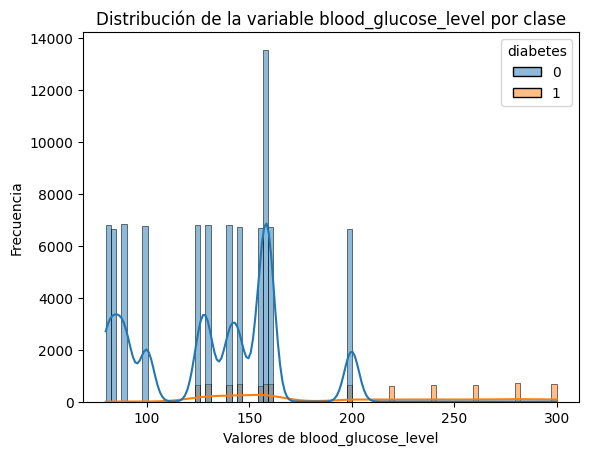

In [9]:
# Distribución de la variable 'blood_glucose_level'
plt.title('Distribución de la variable blood_glucose_level por clase')
plt.xlabel('Valores de blood_glucose_level')
plt.ylabel('Frecuencia')
sns.histplot(data = variables, x = 'blood_glucose_level', hue = 'diabetes', kde = True)
plt.show()

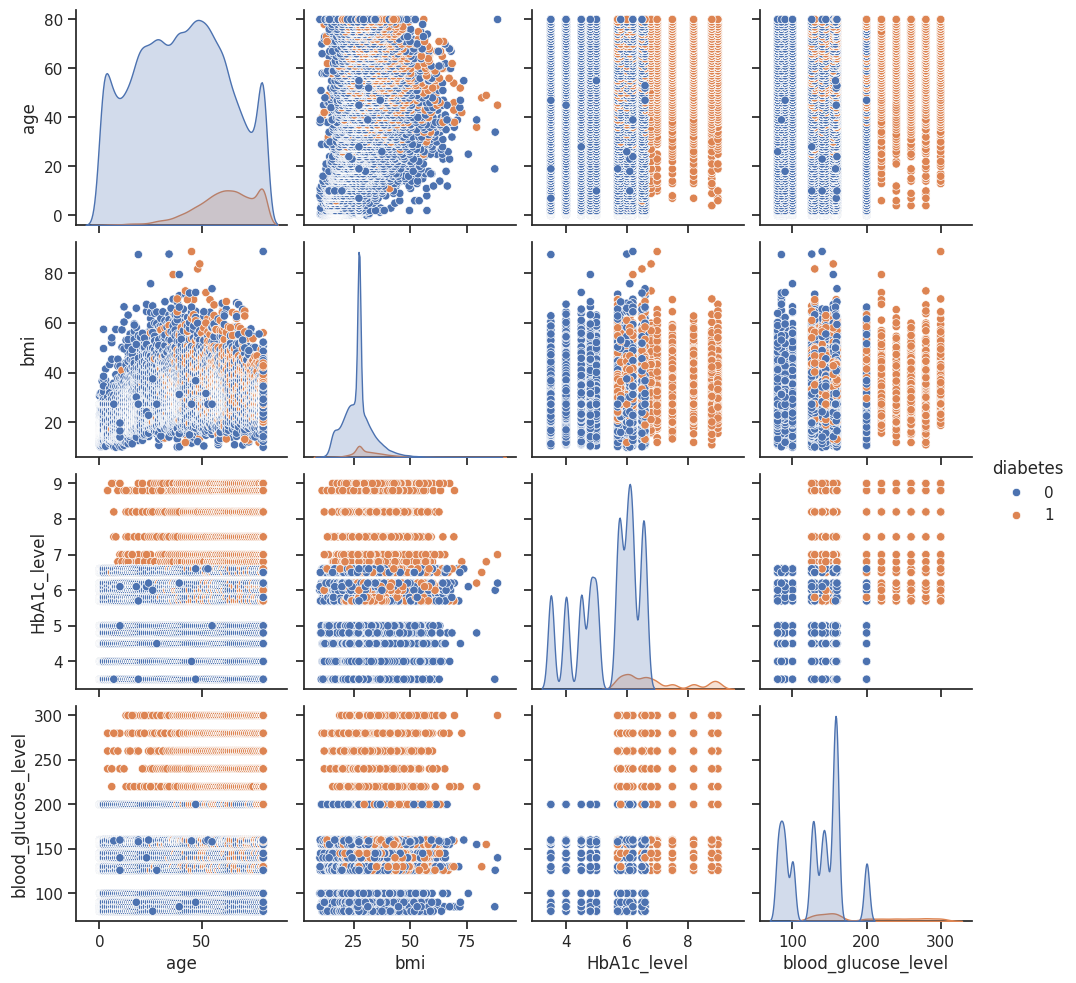

In [10]:
# Diagramas de correlación contra la variable objetivo
sns.set_theme(style = "ticks")
sns.pairplot(variables, hue = "diabetes")
plt.show()

In [19]:
# Matriz de correlación
variables.corr(numeric_only = True)

,age,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.345631,0.106720,0.114304,0.264923
bmi,0.345631,1.000000,0.084554,0.092777,0.215357
HbA1c_level,0.106720,0.084554,1.000000,0.171605,0.406412
blood_glucose_level,0.114304,0.092777,0.171605,1.000000,0.424338
diabetes,0.264923,0.215357,0.406412,0.424338,1.000000


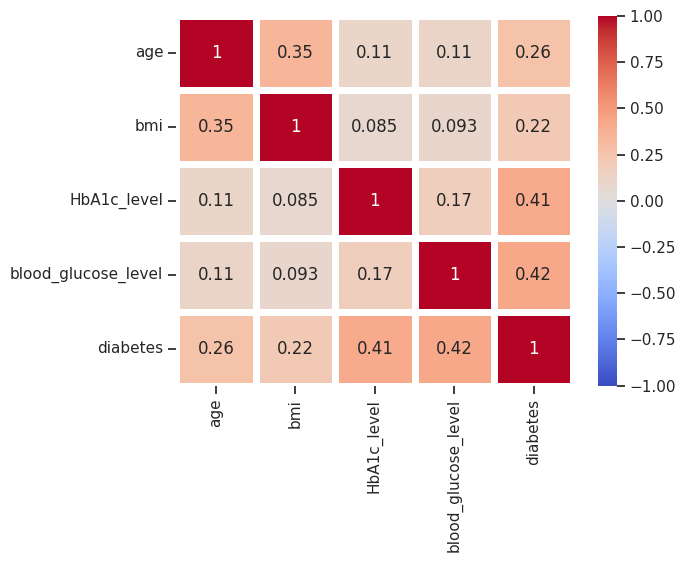

In [22]:
# Mapa de calor de la correlación
sns.heatmap(variables.corr(numeric_only = True), annot = True, linewidths = 5, linecolor = 'white', cmap = 'coolwarm', vmin = -1, vmax = 1);

In [18]:
# Función para calcular la correlación de Spearman
def correlacion_spearmanr(var_1, var_2):
  coef, p = stats.spearmanr(var_1, var_2)
  print(f'Coeficiente de correlación de Spearman: {coef:.2f}')
  if p < 0.05:
    print(f'Las muestras están correlacionadas p = {p:.3f}')
  else:
    print(f'Las muestras no están correlacionadas p = {p:.3f}')

In [25]:
# Correlación entre 'age' y 'bmi'
correlacion_spearmanr(df['age'], df['bmi'])

Coeficiente de correlación de Spearman: 0.36
Las muestras están correlacionadas p = 0.000


In [26]:
# Correlación entre 'age' y 'HbA1c_level'
correlacion_spearmanr(df['age'], df['HbA1c_level'])

Coeficiente de correlación de Spearman: 0.09
Las muestras están correlacionadas p = 0.000


In [27]:
# Correlación entre 'age' y 'blood_glucose_level'
correlacion_spearmanr(df['age'], df['blood_glucose_level'])

Coeficiente de correlación de Spearman: 0.08
Las muestras están correlacionadas p = 0.000


In [28]:
# Correlación entre 'age' y 'diabetes'
correlacion_spearmanr(df['age'], df['diabetes'])

Coeficiente de correlación de Spearman: 0.27
Las muestras están correlacionadas p = 0.000


In [29]:
# Correlación entre 'bmi' y 'HbA1c_level'
correlacion_spearmanr(df['bmi'], df['HbA1c_level'])

Coeficiente de correlación de Spearman: 0.07
Las muestras están correlacionadas p = 0.000


In [34]:
# Correlación entre 'bmi' y 'blood_glucose_level'
correlacion_spearmanr(df['bmi'], df['blood_glucose_level'])

Coeficiente de correlación de Spearman: 0.06
Las muestras están correlacionadas p = 0.000


In [33]:
# Correlación entre 'bmi' y 'diabetes'
correlacion_spearmanr(df['bmi'], df['diabetes'])

Coeficiente de correlación de Spearman: 0.20
Las muestras están correlacionadas p = 0.000


In [32]:
# Correlación entre 'HbA1c_level' y 'blood_glucose_level'
correlacion_spearmanr(df['HbA1c_level'], df['blood_glucose_level'])

Coeficiente de correlación de Spearman: 0.09
Las muestras están correlacionadas p = 0.000


In [31]:
# Correlación entre 'HbA1c_level' y 'diabetes'
correlacion_spearmanr(df['HbA1c_level'], df['diabetes'])

Coeficiente de correlación de Spearman: 0.33
Las muestras están correlacionadas p = 0.000


In [30]:
# Correlación entre 'blood_glucose_level' y 'diabetes'
correlacion_spearmanr(df['blood_glucose_level'], df['diabetes'])

Coeficiente de correlación de Spearman: 0.28
Las muestras están correlacionadas p = 0.000


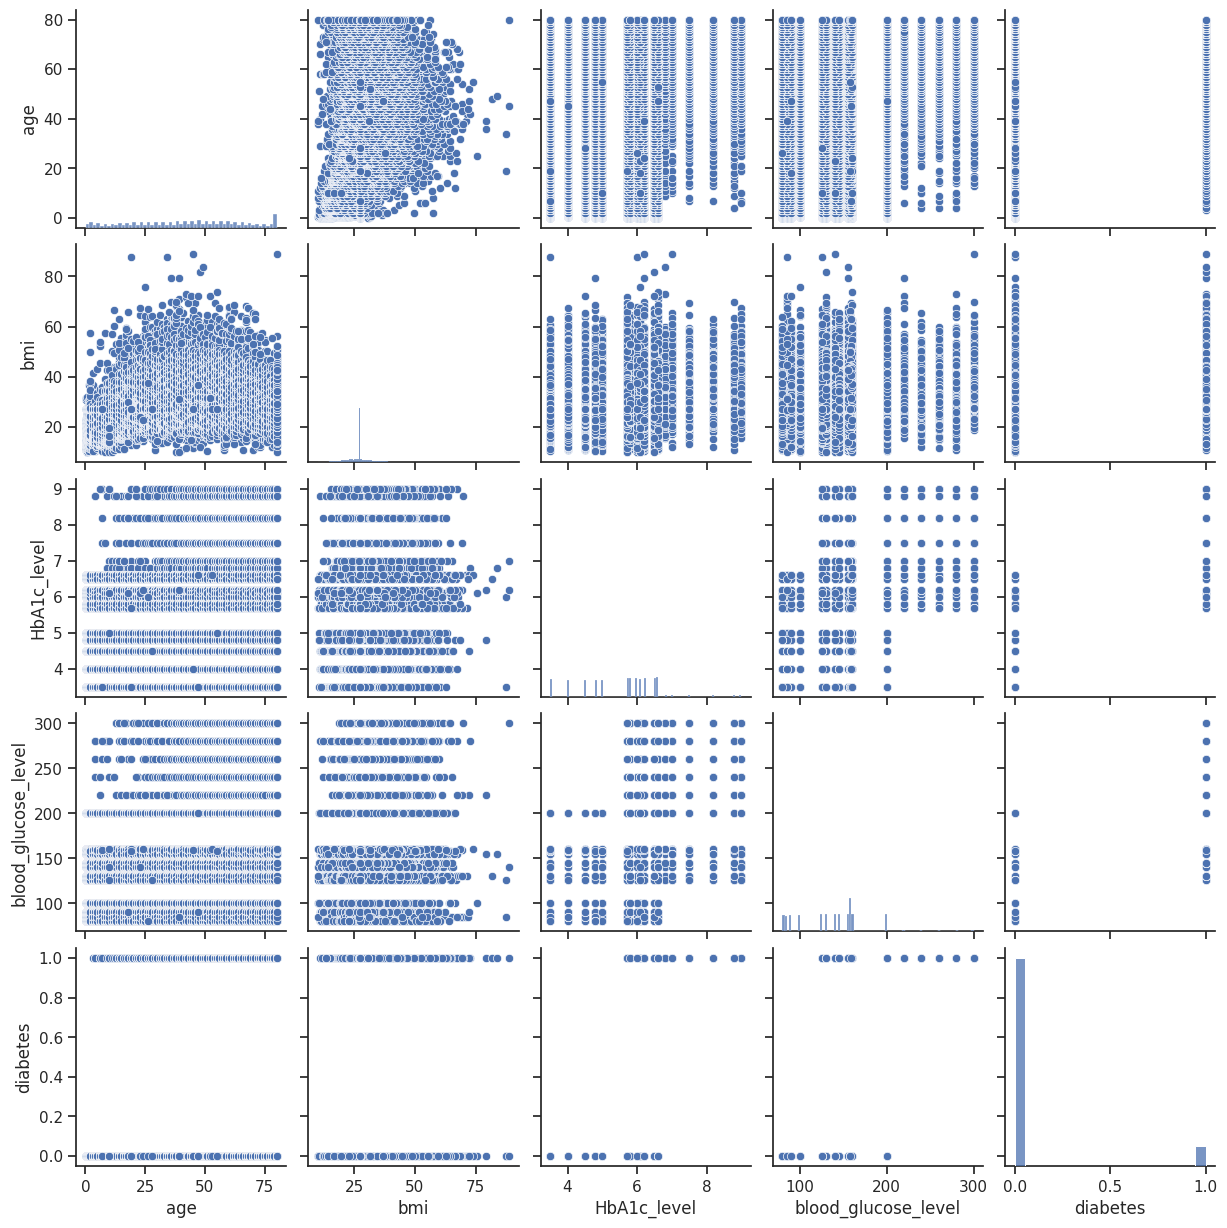

In [23]:
# Diagramas de correlación entre variables númericas
sns.pairplot(variables);

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*